# Attrition Analysis for an Orginization

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
df.shape

(1470, 35)

In [31]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [37]:
df.isnull().sum() / df.shape[0] * 100.00

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

There is no missing values on any of the attributes in the dataset.

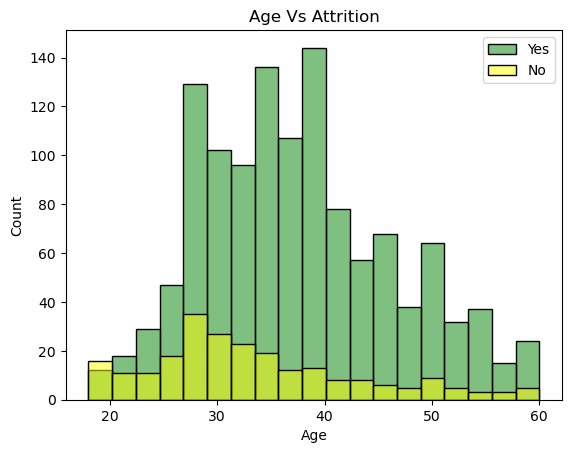

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='Age', hue='Attrition', palette=['yellow', 'green']).set_title(f"Age Vs Attrition")
plt.legend(labels=['Yes', 'No'])
plt.show()

Here is a plot for attrition by age, this plot shows that, the attrition is quite high for the age group of 25 to 40, and attrition became low when the age increase.

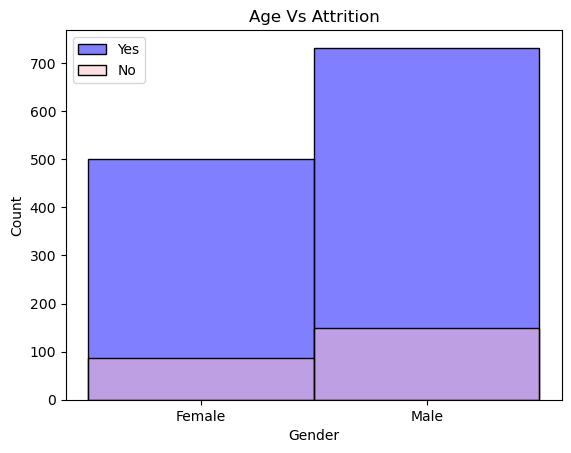

In [33]:
sns.histplot(data=df, x='Gender', hue='Attrition', palette=['pink', 'blue']).set_title(f"Age Vs Attrition")
plt.legend(labels=['Yes', 'No'])
plt.show()

When we do the plot for Attrition by Gender, then it shows that male have higher attrition rate compared to female.

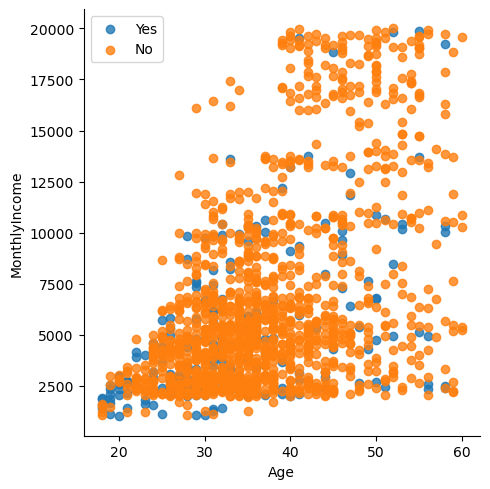

In [34]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Age", y="MonthlyIncome", data=df, fit_reg=False, hue='Attrition', legend=False)
plt.legend(labels=['Yes', 'No'])
plt.show()

This scatter plot is quite interesting, here I have plotted Age vs Income which clearly shows a pattern that as the age become oler the monthly income increases, but the attrition does not show the same pattern, it shows when montly income is low then the attrition is high because people look for other company to increas the salary, as the salary become higher the attrition rate gradually slow down.

In [35]:
def worklife(row):
    if row == 1:
        return 'Bad' 
    if row == 2:
        return 'Good'
    if row == 3:
        return 'Better'
    if row == 4:
        return 'Best'
df["WorkLifeBalance"] = df["WorkLifeBalance"].apply(worklife)
df[["WorkLifeBalance"]].value_counts()


WorkLifeBalance
Better             893
Good               344
Best               153
Bad                 80
dtype: int64

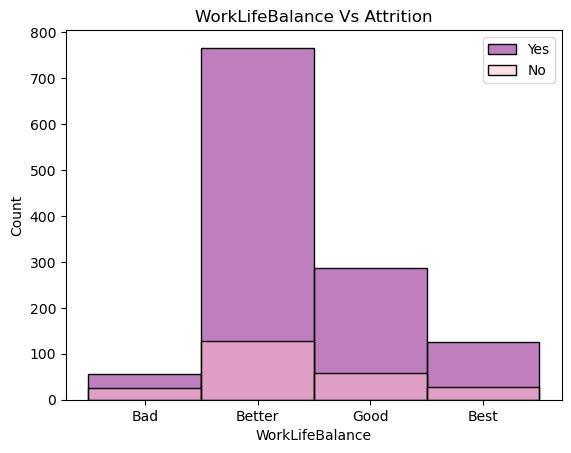

In [36]:
sns.histplot(data=df, x='WorkLifeBalance', hue='Attrition', palette=['pink', 'purple']).set_title("WorkLifeBalance Vs Attrition")
plt.legend(labels=['Yes', 'No'])
plt.show()

Here I tried to find the attrition rate for the employees, based on their work life balance, I was expecting this attrition rate will be high for bad WorkLifeBalace, but its actully not true, as per the plot the employees who have better worklife balance has really high attrition rate.

In [40]:
def jobsatisfaction(row):
    if row == 1:
        return 'Low' 
    if row == 2:
        return 'Medium'
    if row == 3:
        return 'High'
    if row == 4:
        return 'Very High'
df["JobSatisfaction"] = df["JobSatisfaction"].apply(jobsatisfaction)
df[["JobSatisfaction"]].value_counts()

JobSatisfaction
Very High          459
High               442
Low                289
Medium             280
dtype: int64

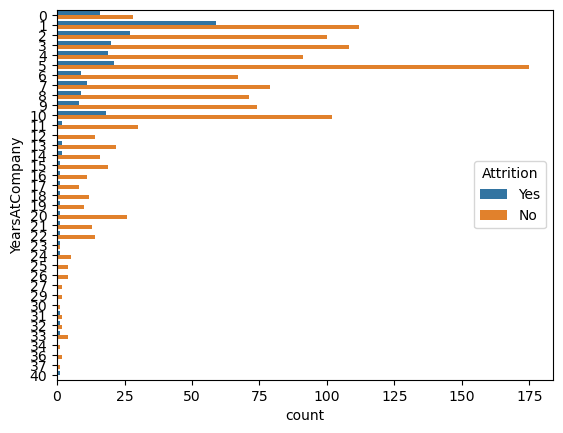

In [49]:
# use the scatterplot function
sns.countplot(
                   y="YearsAtCompany", 
                   data=df, 
                   hue='Attrition')

# show the graph
plt.show()

Here is the count plot for attrition by years at company, looking at the plot it clearly says when the year at company is low employees are tend to switch jobs and its high around one year working at company, when people start saying longer time, the attrition rate reduces.

We can conclude from the above analysis that Age, Gender, Monthly Income, Work Life Balance and Number of year in the company have somehow effect on attrition.